In [61]:
#Observations and Insights
    # There is only one potential outlier for final tumor volume. This can be seen in the box plot for the Infubinol regimen.
    # For mouse ID s185 the tumor volume appears to decrease over time with the Capomulin regimen. This is shown on the line plot.
    # Average tumor volume appears to increase with the weight of the mouse as shown in the scatter plot.

## Observations and Insights 

In [2]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
import dataframe_image as dfi

# Create path
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID' )

# Display the data table for preview
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Checking the number of mice.
len(combined_df['Mouse ID'].unique())

249

In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_filter = combined_df.duplicated(['Mouse ID', 'Timepoint'])
duplicated_mice = combined_df.loc[duplicated_filter,:]
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = combined_df.loc[:,'Mouse ID']=='g989'
duplicated_mouse_df = combined_df.loc[duplicated_mouse,:]
duplicated_mouse_df
dfi.export(duplicated_mouse_df, '../Images/duplicated_mouse.png')

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop(combined_df[combined_df['Mouse ID'] == 'g989'].index)
clean_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Find number of mice in clean data frame
unique_mice_df =  clean_df['Mouse ID'].unique()
len(unique_mice_df)


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby for each regimen 
grouped_df = clean_df.groupby('Drug Regimen')
# Find mean, median, variance, standard deviation, and SEM of the tumor volume 
tumor_mean = grouped_df['Tumor Volume (mm3)'].mean()
tumor_median = grouped_df['Tumor Volume (mm3)'].median()
tumor_variance = grouped_df['Tumor Volume (mm3)'].var()
tumor_stdev = grouped_df['Tumor Volume (mm3)'].std()
tumor_sem = grouped_df['Tumor Volume (mm3)'].sem()
# Create data frame
tumor_summary_df = pd.DataFrame({'Mean': tumor_mean,
                    'Medain': tumor_median,
                    'Variance': tumor_variance,
                    'Standard Deviation': tumor_stdev,
                    'SEM': tumor_sem})
# Display data frame
tumor_summary_df
dfi.export(tumor_summary_df, '../Images/tumor_summary.png')

In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
aggregate_df = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg([('Mean' , 'mean'),
                                                                             ('Median' , 'median'),
                                                                             ('Variance' , 'var'),
                                                                             ('Standard Deviation' , 'std'),
                                                                             ('SEM' , 'sem')])
# Display data frame
aggregate_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

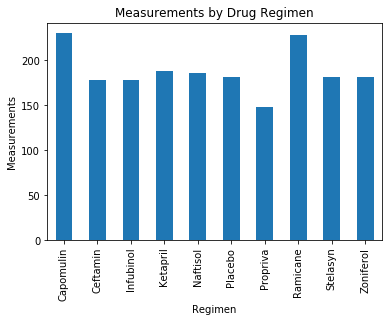

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas
# Find measurement count by grouped regimen
grouped_regimen_mice_df = clean_df.groupby('Drug Regimen')
regimen_count = grouped_regimen_mice_df['Tumor Volume (mm3)'].count()
# Create plot
regimen_chart=regimen_count.plot(kind='bar')
regimen_chart
# Add title and labels
regimen_chart.set_title("Measurements by Drug Regimen")
regimen_chart.set_xlabel("Regimen")
regimen_chart.set_ylabel("Measurements")
regimen_chart.figure.savefig("../Images/regimen_bar.png",bbox_inches = "tight" )

Text(0, 0.5, 'Measurements')

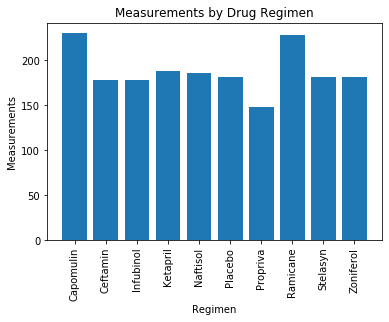

In [24]:
# Generate the same bar plot using pyplot
#Create x_axis
x_axis = np.arange(len(grouped_regimen_mice_df))
#Create tick locations
tick_locations = [value for value in x_axis]
#Create plot
plt.bar(x_axis, regimen_count)
#Plot ticks
plt.xticks(tick_locations, ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane',    
       'Stelasyn', 'Zoniferol'] , rotation="vertical")
#Add title and labels
plt.title("Measurements by Drug Regimen")
plt.xlabel("Regimen")
plt.ylabel("Measurements")

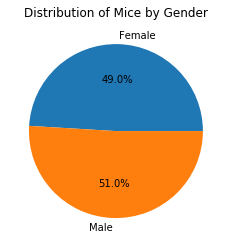

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Group by gender
grouped_gender_df = clean_df.groupby('Sex')
# Find measurement count by grouped gender
mice_gender_count = grouped_gender_df['Mouse ID'].count()
# Create plot
gender_chart=mice_gender_count.plot(kind='pie', autopct='%1.1f%%')
gender_chart
# Add title and remove ylabel
gender_chart.set_title("Distribution of Mice by Gender")
gender_chart.set_ylabel('')
gender_chart.figure.savefig("../Images/gender_pie.png",bbox_inches = "tight" )


Text(0.5, 1.0, 'Distribution of Mice by Gender')

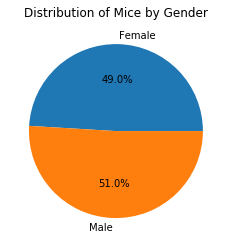

In [14]:
# Generate the same pie plot using pyplot
# Create Labels
labels = ['Female','Male']
# Create plot
plt.pie(mice_gender_count, labels=labels, autopct='%1.1f%%')
# Add title and labels
plt.title("Distribution of Mice by Gender")




## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Filter for regimens
regimen_filtered_df = clean_df.loc[((clean_df['Drug Regimen'] == 'Capomulin')
                                    | (clean_df['Drug Regimen'] == 'Ramicane')
                                    |(clean_df['Drug Regimen'] == 'Infubinol')
                                    | (clean_df['Drug Regimen'] == 'Ceftamin')),:]
# Start by getting the last (greatest) timepoint for each mouse
# Use groupby for mouse ID and create data frame for the max
grouped_timepoint_df = regimen_filtered_df.groupby('Mouse ID')
max_df = grouped_timepoint_df.max()
# Find max time data points
max_timepoint_df = max_df['Timepoint']
# Merge df based on mouse ID and timepoint
combined_max_tumor_df = pd.merge(clean_df,max_timepoint_df,  on=['Mouse ID','Timepoint'])
combined_max_tumor_df
# Rename column to final tumor volume
renamed_max_timepoint_df = combined_max_tumor_df.rename({'Tumor Volume (mm3)' : 'Final Tumor Volume (mm3)'}, axis=1)
# Display data frame
renamed_max_timepoint_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Final Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [16]:
# Using the above data frame, calculate the IQR, quartiles and quantitatively determine if there are any potential outliers 
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin' ]
# Create empty lists to fill with tumor vol data (for plotting)
capomulin_tumor_vol_data = []
ramicane_tumor_vol_data = []
infubinol_tumor_vol_data = []
ceftamin_tumor_vol_data = []
# For each row locate final tumor volume and append to above lists based on drug regimen
for index, row in renamed_max_timepoint_df.iterrows():
    if row['Drug Regimen'] == 'Capomulin':
        capomulin_tumor_vol_data.append(row['Final Tumor Volume (mm3)'])    
    elif row['Drug Regimen'] == 'Ramicane':
        ramicane_tumor_vol_data.append(row['Final Tumor Volume (mm3)'])     
    elif row['Drug Regimen'] == 'Infubinol':
        infubinol_tumor_vol_data.append(row['Final Tumor Volume (mm3)']) 
    elif row['Drug Regimen'] == 'Ceftamin':
        ceftamin_tumor_vol_data.append(row['Final Tumor Volume (mm3)'])   
#Put lists into dictionary and data frame
regimen_final_tumor_volume_df = pd.DataFrame({'Capomulin' : pd.Series(capomulin_tumor_vol_data),
                                             'Ramicane'  : pd.Series(ramicane_tumor_vol_data),
                                             'Infubinol' : pd.Series(infubinol_tumor_vol_data), 
                                             'Ceftamin'  : pd.Series(ceftamin_tumor_vol_data)})
#Determine outliers using upper and 'ower bounds
#Capomulin 
quartiles_capomulin = regimen_final_tumor_volume_df['Capomulin'].quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin-lowerq_capomulin
lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)
#Find outlier fliers
outlier_fliers_capomulin = []
for x in capomulin_tumor_vol_data:
    if (x < lower_bound_capomulin) | (x > upper_bound_capomulin):
        outlier_fliers_capomulin.append(x)
if outlier_fliers_capomulin == []:
    outlier_fliers_capomulin = "No Potential Outliers"
#Ramicane
quartiles_ramicane = regimen_final_tumor_volume_df['Ramicane'].quantile([.25,.5,.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane-lowerq_ramicane
lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)
#Find outlier fliers
outlier_fliers_ramicane = []
for x in ramicane_tumor_vol_data:
    if (x < lower_bound_ramicane) | (x > upper_bound_ramicane):
        outlier_fliers_ramicane.append(x)
if outlier_fliers_ramicane == []:
    outlier_fliers_ramicane = "No Potential Outliers"
#Infubinol
quartiles_infubinol = regimen_final_tumor_volume_df['Infubinol'].quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol-lowerq_infubinol
lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)
#Find outlier fliers
outlier_fliers_infubinol = []
for x in infubinol_tumor_vol_data:
    if (x < lower_bound_infubinol) | (x > upper_bound_infubinol):
        outlier_fliers_infubinol.append(x)
if outlier_fliers_ramicane == []:
    outlier_fliers_ramicane = "No Potential Outliers"
new_outlier_fliers_infubinol = [round(x,2) for x in outlier_fliers_infubinol]
#Ceftamin
quartiles_ceftamin = regimen_final_tumor_volume_df['Ceftamin'].quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin-lowerq_ceftamin
lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)
#Find outlier fliers
outlier_fliers_ceftamin = []
for x in ceftamin_tumor_vol_data:
    if (x < lower_bound_ceftamin) | (x > upper_bound_ceftamin):
        outlier_fliers_ceftamin.append(x)
if outlier_fliers_ceftamin == []:
    outlier_fliers_ceftamin = "No Potential Outliers"

#Print output for Capomulin
print(f'Capomulin Final Tumor Volume Quantitative Analysis')
print(f"The lower quartile of final tumor volume (mm3) for the Capomulin regimen is: {str(round(lowerq_capomulin, 2))}")
print(f"The upper quartile of final tumor volume (mm3) for the Capomulin regimen is: {str(round(upperq_capomulin, 2))}")
print(f"The interquartile range of final tumor volume (mm3) for the Capomulin regimen is: {str(round(iqr_capomulin, 2))}")
print(f"The the median of final tumor volume (mm3) for the Capomulin regimen is: {str(round(quartiles_capomulin[0.5], 2))} ")
print(f"Values below {str(round(lower_bound_capomulin, 2))} could be outliers.")
print(f"Values above {str(round(upper_bound_capomulin, 2))} could be outliers.")
print(f"Potential Outliers: {outlier_fliers_capomulin}")
print('----------------------------------------------------------------------------------------')
#Print output for Ramicane
print(f'Ramicane Final Tumor Volume Quantitative Analysis')
print(f"The lower quartile of final tumor volume (mm3) for the Ramicane regimen is: {str(round(lowerq_ramicane, 2))}")
print(f"The upper quartile of final tumor volume (mm3) for the Ramicane regimen is: {str(round(upperq_ramicane, 2))}")
print(f"The interquartile range of final tumor volume (mm3) for the Ramicane regimen is: {str(round(iqr_ramicane, 2))}")
print(f"The the median of final tumor volume (mm3) for the Ramicane regimen is: {str(round(quartiles_ramicane[0.5], 2))} ")
print(f"Values below {str(round(lower_bound_ramicane, 2))} could be outliers.")
print(f"Values above {str(round(upper_bound_ramicane, 2))} could be outliers.")
print(f"Potential Outliers: {outlier_fliers_ramicane}")
print('----------------------------------------------------------------------------------------')  
#Print output for Infubinol
print(f'Infubinol Final Tumor Volume Quantitative Analysis')
print(f"The lower quartile of final tumor volume (mm3) for the Infubinol regimen is: {str(round(lowerq_infubinol, 2))}")
print(f"The upper quartile of final tumor volume (mm3) for the Infubinol regimen is: {str(round(upperq_infubinol, 2))}")
print(f"The interquartile range of final tumor volume (mm3) for the Infubinol regimen is: {str(round(iqr_infubinol, 2))}")
print(f"The the median of final tumor volume (mm3) for the Infubinol regimen is: {str(round(quartiles_infubinol[0.5], 2))} ")
print(f"Values below {str(round(lower_bound_infubinol, 2))} could be outliers.")
print(f"Values above {str(round(upper_bound_infubinol, 2))} could be outliers.")
print(f"Potential Outliers: {new_outlier_fliers_infubinol}")
print('----------------------------------------------------------------------------------------')   
#Print output for Ceftamin
print(f'Ceftamin Final Tumor Volume Quantitative Analysis')
print(f"The lower quartile of final tumor volume (mm3) for the Ceftamin regimen is: {str(round(lowerq_ceftamin, 2))}")
print(f"The upper quartile of final tumor volume (mm3) for the Ceftamin regimen is: {str(round(upperq_ceftamin, 2))}")
print(f"The interquartile range of final tumor volume (mm3) for the Ceftamin regimen is: {str(round(iqr_ceftamin, 2))}")
print(f"The the median of final tumor volume (mm3) for the Ceftamin regimen is: {str(round(quartiles_ceftamin[0.5], 2))} ")
print(f"Values below {str(round(lower_bound_ceftamin, 2))} could be outliers.")
print(f"Values above {str(round(upper_bound_ceftamin, 2))} could be outliers.")
print(f"Potential Outliers: {outlier_fliers_ceftamin}")
   

Capomulin Final Tumor Volume Quantitative Analysis
The lower quartile of final tumor volume (mm3) for the Capomulin regimen is: 32.38
The upper quartile of final tumor volume (mm3) for the Capomulin regimen is: 40.16
The interquartile range of final tumor volume (mm3) for the Capomulin regimen is: 7.78
The the median of final tumor volume (mm3) for the Capomulin regimen is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
Potential Outliers: No Potential Outliers
----------------------------------------------------------------------------------------
Ramicane Final Tumor Volume Quantitative Analysis
The lower quartile of final tumor volume (mm3) for the Ramicane regimen is: 31.56
The upper quartile of final tumor volume (mm3) for the Ramicane regimen is: 40.66
The interquartile range of final tumor volume (mm3) for the Ramicane regimen is: 9.1
The the median of final tumor volume (mm3) for the Ramicane regimen is: 36.56 
Values below 17.91 could be outl

In [17]:
len(infubinol_tumor_vol_data)

25

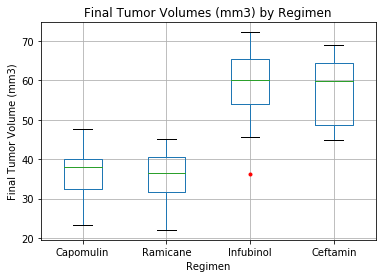

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Create box plot and adjust symbol style and color
boxplot = regimen_final_tumor_volume_df.boxplot(sym = 'r.')
#Add title and labels
plt.title('Final Tumor Volumes (mm3) by Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Regimen')  
boxplot.figure.savefig("../Images/boxplot.png",bbox_inches = "tight" )    



## Line and Scatter Plots

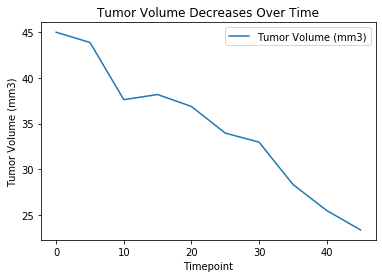

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Create filter for mouse s185
s185_mouse = clean_df.loc[:,'Mouse ID']== 's185'
# Create dataframe
s185_mouse_df = clean_df.loc[s185_mouse,:]
# Filter down to timepoint and tumor volume. Set index as Timepoint
filtered_s185_df = s185_mouse_df[['Timepoint', 'Tumor Volume (mm3)']]
filtered_s185_df = filtered_s185_df.set_index('Timepoint')
# Create plot, add labels and title
s185_plot=filtered_s185_df.plot()
s185_plot.set_ylabel("Tumor Volume (mm3)")
s185_plot.set_title("Tumor Volume Decreases Over Time")
s185_plot.figure.savefig("../Images/line.png",bbox_inches = "tight" )

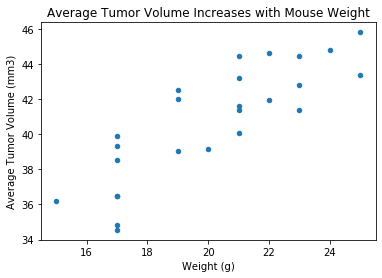

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Create filter for drug regimen Capomulin
filter_capomulin = clean_df.loc[:,'Drug Regimen']== 'Capomulin'
# Create data frame for drug regimen Capomulin
capomulin_df = clean_df.loc[filter_capomulin,:]
# Groupby mouse ID and get average tumor volume
groupby_capomulin_df = capomulin_df.groupby('Mouse ID')
average_tumor_volume_df = groupby_capomulin_df.mean()
# Create new data frame with just weight and tumor volume for plot
filtered_average_tumor_volume_df = average_tumor_volume_df[['Weight (g)', 'Tumor Volume (mm3)']]
# Create scatter plot
capomulin_plot=filtered_average_tumor_volume_df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')
# Add labels
capomulin_plot.set_ylabel("Average Tumor Volume (mm3)")
capomulin_plot.set_title("Average Tumor Volume Increases with Mouse Weight")
capomulin_plot.figure.savefig("../Images/scatter.png",bbox_inches = "tight" )

## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708717


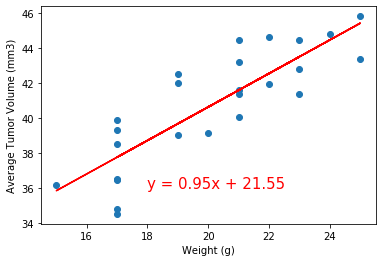

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Find mouse wieght
mouse_weight = filtered_average_tumor_volume_df.loc[:,'Weight (g)']
# Find average tumor volume
average_tumor_volume = filtered_average_tumor_volume_df.loc[:,'Tumor Volume (mm3)']
#Calculate and print correlation between mouse weight and average tumor volume
correlation = st.pearsonr(mouse_weight, average_tumor_volume )
print(f"The correlation between both factors is {round(correlation[0],2)}")
#Set up values and calculate linear regression line for plot
x_values = mouse_weight
y_values = average_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Create scatter plot
plt.scatter(x_values,y_values)
# Plot linear regresion line
plt.plot(x_values,regress_values,"r-")
# Add equation and labels
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
# Print r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.show()
